In [ ]:
'''
Alejandro Fernández Trigo
'''

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagen = cv.imread('img/10_NorthCarolina.jpg',cv.IMREAD_GRAYSCALE)

In [3]:
# Matriz de ejemplo del enunciado:
matriz_ejemplo = np.array([
    [12,17,32],
    [26,17,40],
    [14,20,27],
])

In [5]:
# Función amplía: recibe la imagen
def amplia(img):
    
    # Constante del enunciado: 
    R = 2
    # Matriz de ceros doblemente grande a la de entrada:
    resultado = np.zeros([img.shape[0] * R, img.shape[1] * R])
    
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    # Añade a dicha matriz, los ND originales pero en sus posiciones originales:
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resultado[i * R, j * R] = img[i,j]
    print("Paso I")
    print(resultado)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")

    # Aplica interpolación lineal por columnas:
    for i in range(1, resultado.shape[0]-1, 2):
        for j in range(0, resultado.shape[1],2):
             resultado[i,j] = int((resultado[i-1,j] + resultado[i+1,j]) / 2)
    print("Paso II")
    print(resultado)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    
    # Aplica interpolación lineal por filas:
    for i in range(resultado.shape[0]):
        for j in range(1, resultado.shape[1]-1, 2):
             resultado[i,j] = int((resultado[i,j-1] + resultado[i,j+1]) / 2)
    print("Paso III")
    print(resultado)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    
    # Sobre la última fila copia los elementos de la anterior:
    for i in range(resultado.shape[0]):
         resultado[i,-1] = resultado[i,-2]
    print("Paso IV")
    print(resultado)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    
    # Sobre la última columna copia los elementos de la anterior:
    resultado[-1] = resultado[-2]
    print("Paso V")
    print(resultado)
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    
    return resultado

In [6]:
print("Matriz de ejemplo: \n" + str(matriz_ejemplo))
matriz_ampliada = amplia(matriz_ejemplo)
print("Matriz de ejemplo ampliada: \n" + str(matriz_ampliada))

Matriz de ejemplo: 
[[12 17 32]
 [26 17 40]
 [14 20 27]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso I
[[12.  0. 17.  0. 32.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [26.  0. 17.  0. 40.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [14.  0. 20.  0. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso II
[[12.  0. 17.  0. 32.  0.]
 [19.  0. 17.  0. 36.  0.]
 [26.  0. 17.  0. 40.  0.]
 [20.  0. 18.  0. 33.  0.]
 [14.  0. 20.  0. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso III
[[12. 14. 17. 24. 32.  0.]
 [19. 18. 17. 26. 36.  0.]
 [26. 21. 17. 28. 40.  0.]
 [20. 19. 18. 25. 33.  0.]
 [14. 17. 20. 23. 27.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso IV
[[12. 14. 17. 24. 32. 32.]
 [19. 18. 17. 26. 36. 36.]
 [26. 21. 17. 28. 40. 40.]
 [20. 19. 18. 25. 33. 33.]
 [14. 17. 20. 23. 27. 27.]
 [ 0.  0.  0.  0.  0.  0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso V
[[12. 14. 17. 24. 32. 32.]
 [19. 18. 17. 26. 36. 36.]
 [2

Original


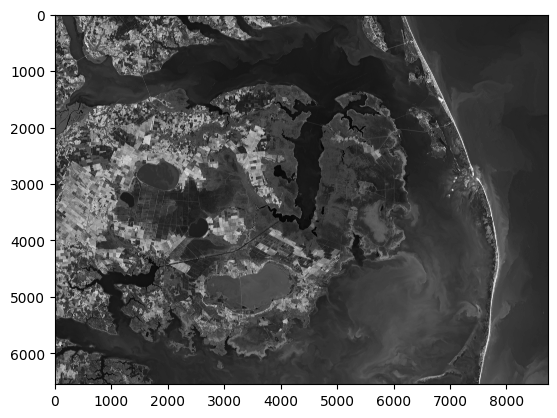

In [7]:
# Aplicado a la imagen:
print("Original")
plt.imshow(imagen,cmap='gray')

Ampliado
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso I
[[ 53.   0.  52. ...   0.  36.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 79.   0.  60. ...   0.  36.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [173.   0. 141. ...   0.  74.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso II
[[ 53.   0.  52. ...   0.  36.   0.]
 [ 66.   0.  56. ...   0.  36.   0.]
 [ 79.   0.  60. ...   0.  36.   0.]
 ...
 [180.   0. 133. ...   0.  76.   0.]
 [173.   0. 141. ...   0.  74.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso III
[[ 53.  52.  52. ...  36.  36.   0.]
 [ 66.  61.  56. ...  36.  36.   0.]
 [ 79.  69.  60. ...  36.  36.   0.]
 ...
 [180. 156. 133. ...  76.  76.   0.]
 [173. 157. 141. ...  74.  74.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Paso IV
[[ 53.  52.  52. ...  36.  36.  36.]
 [ 66.  61.  56. ...  36.  36.  36.]
 [ 79.  69.  60. ...  36.  36.  36.]
 ...
 [1

True

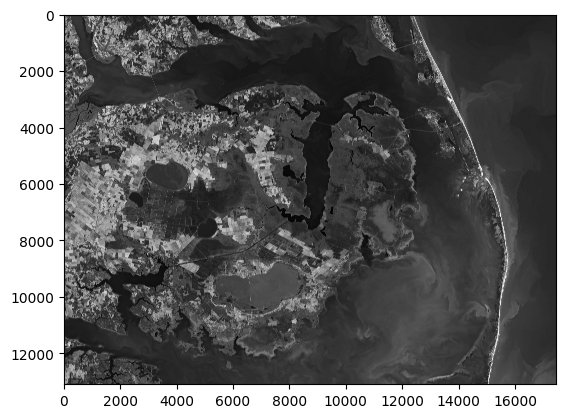

In [8]:
# Esto puede tardar bastante... la imagen de salida pesa casi 100 Mb frente a los 10 Mb de la original!
print("Ampliado")
ampliado = amplia(imagen)
plt.imshow(ampliado,cmap='gray')
cv.imwrite("salida/Ampliado.png", ampliado)